## Business Problem

**Context**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

**Concept Used:**

* Exploratory Data Analysis
* Linear Regression

**How to begin:**

* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
* Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
* Use Non-graphical and graphical analysis for getting inferences about variables. This can be done by checking the distribution of variables of graduate applicants.
* Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
* Check correlation among independent variables and how they interact with each other.
* Use Linear Regression from (Statsmodel library) and explain the results.

    **Test the assumptions of linear regression:**
        * Multicollinearity check by VIF score
        * Mean of residuals
        * Linearity of variables (no pattern in residual plot)
        * Test for Homoscedasticity
        * Normality of residuals
        * Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
        * Provide actionable Insights & Recommendations

## Import Libraries

In [1]:
from jamboree import BasicDataChecks, ExploratoryDataAnalysis, HypothesisTesting, LinearRegression, print_format, lr_models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

---
## Basic Data Checks - Null, Duplicate, etc.

In [2]:
basic_data_checks = BasicDataChecks("Jamboree_Admission.csv")
basic_data_checks.check
data = basic_data_checks.data

----------------------------------------------------------------------------------------------------
Data head: 
            gre_score  toefl_score  university_rating  sop  lor_  cgpa  research  chance_of_admit_
Serial No.                                                                                        
0                 337          118                  4  4.5   4.5  9.65         1              0.92
1                 324          107                  4  4.0   4.5  8.87         1              0.76
2                 316          104                  3  3.0   3.5  8.00         1              0.72
3                 322          110                  3  3.5   2.5  8.67         1              0.80
4                 314          103                  2  2.0   3.0  8.21         0              0.65
----------------------------------------------------------------------------------------------------
Data tail:  
            gre_score  toefl_score  university_rating  sop  lor_  cgpa  research

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>No null values in the data set.</li>
<li>No duplicate values in the data set.</li>
<li>Data is available for <b>500</b> students.</li>
<li>GRE scores on average are 316 with $\pm$ 11 fluctuation (which is low and good). Students have indeed scored the highest possible 340 as well. The minimum between 500 students is 290, which as a simple google search reveals is good many universities.</li>
<li>TOEFL score also display a good average of 107 with $\pm$ 6 fluctuation. Minimum score is 92. As per Google, a score is anything above 90. </li>
<li>University ratings out 5, have an average of 3, implying that most students indeed make it to an average rate university (rating of 3). SOP and LOR strength rating support the same fact.</li>
<li>Undergrad CGPA of more than 8.5 on average is required for admits. Possible exceptions exist, wherein a GPA as low as 6.8 also exists. It would be interesting to check the strength of LOR and SOPs for such students.</li>
<li>Majority of the students (~56%) have research experience of atmost 1 year.</li>
<li>The chances of admit, on average to a university are 72%.</li>
</ul>

<div class="alert alert-block alert-info"><b><i>Additional Views</i></b></div>
<ul>
<li>It would be interesting to see, how much the strenth of the LOR and SOP affect the chances of admission, given a range of GPAs.</li>
<li>Following the above, possible outliers could also be identified for students with less than average GPA, but high strength of SOP and LOR, getting into highly-ranked universities.</li>
</ul>

---
## Data Exploration
Performing univariate and bivariate exploratory data analysis with relevant comments.

### Variable Distribution

Violin Plot of Continuous Variables: 



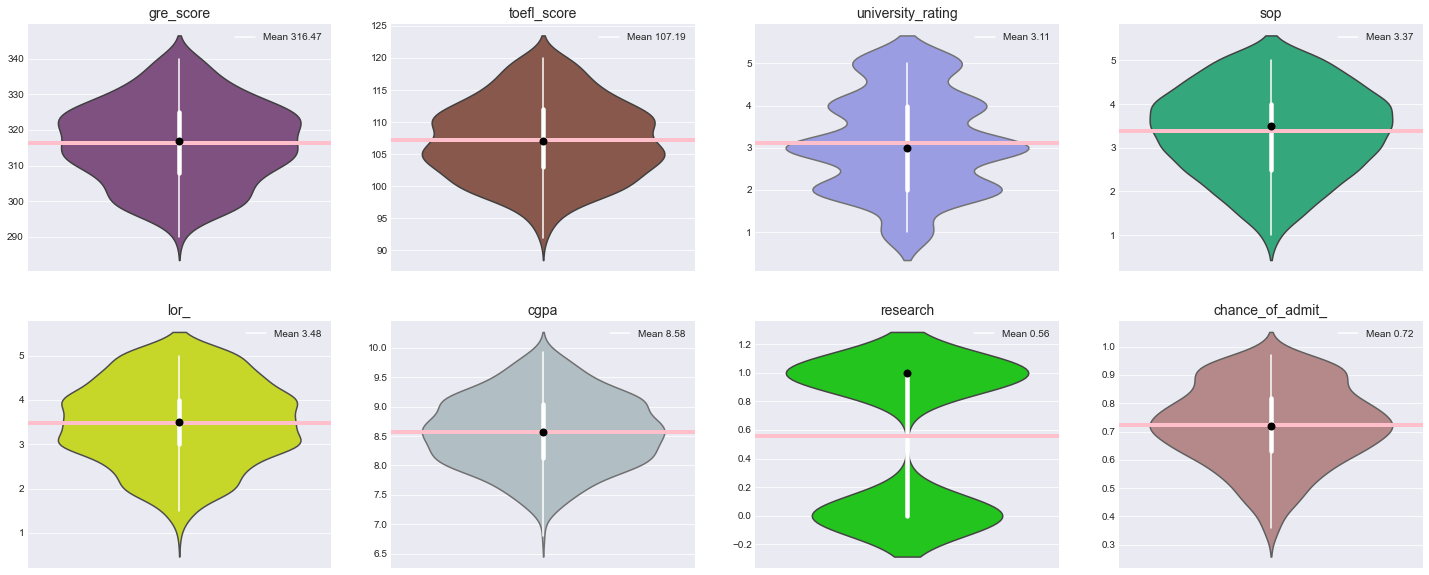

-------------------------------------------------------------------------------------
Normality Check for: gre_score



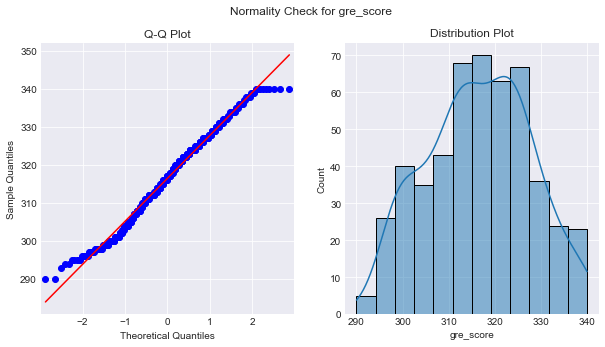

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that gre_score doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: toefl_score



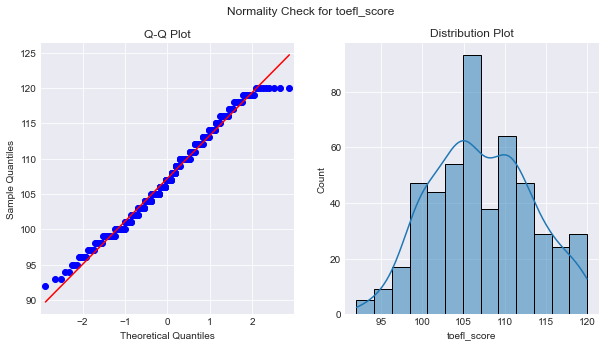

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that toefl_score doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: university_rating



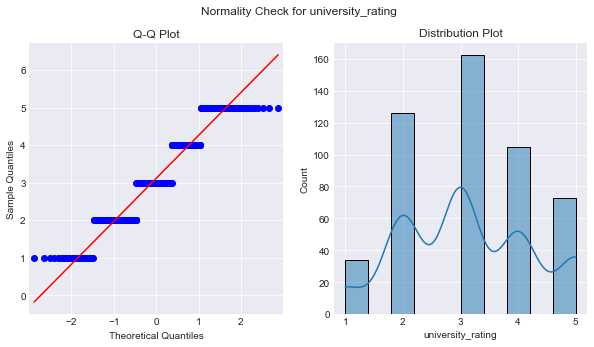

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that university_rating doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: sop



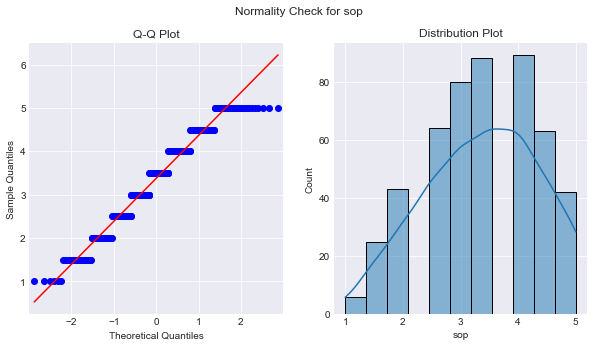

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that sop doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: lor_



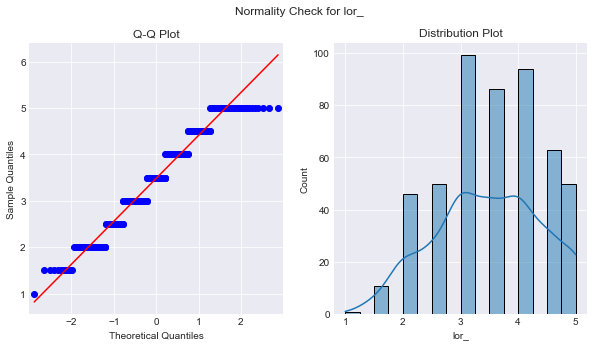

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that lor_ doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: cgpa



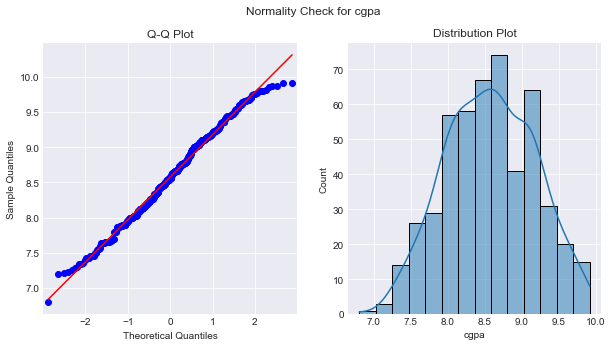

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.01 | alpha: 0.05
We have sufficient evidence to say that cgpa doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: research



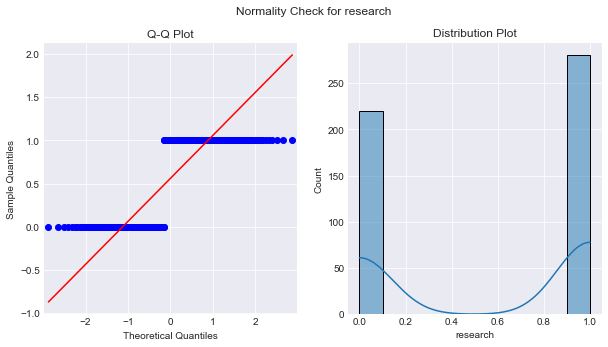

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that research doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Normality Check for: chance_of_admit_



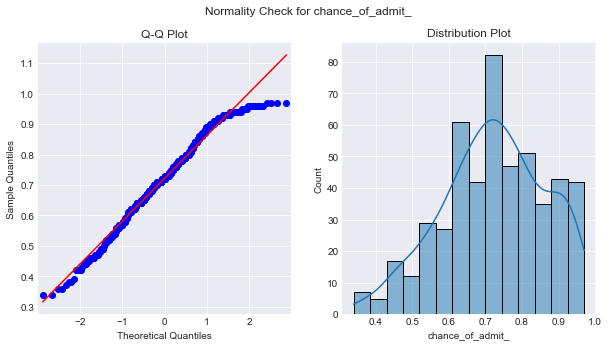

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that chance_of_admit_ doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------


In [3]:
eda = ExploratoryDataAnalysis(data, [])
eda.univariate_analysis(num_lines = 160, width = 25, height = 10, ncols = 4, box=False, hist = False)

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>None of the variables follow a normal distribution.</li>
<li>None of the variables are affected by extreme outliers.</li>
</ul>

### Correlation

Pearson's Correlation between Continuous Variables: 



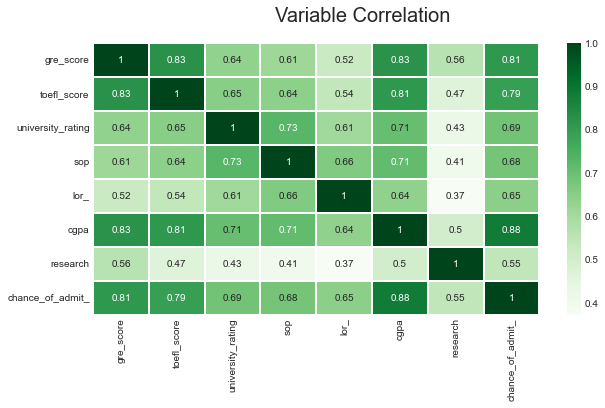


Spearman's Correlation between Continuous Variables: 



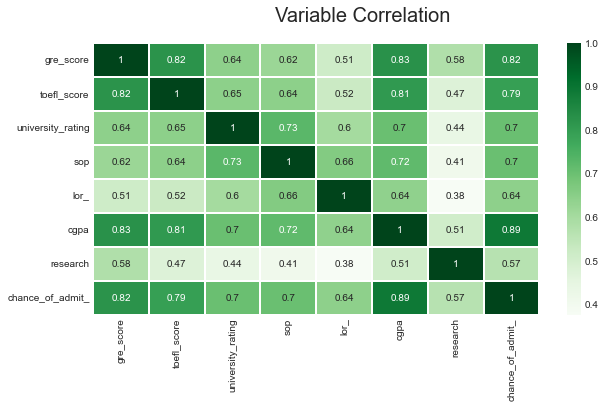

In [4]:
eda.bivariate_analysis(corr=True)

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>GRE Score, TOEFL Score & CGPA have the maximum effect on admission.
<li>The three variables between themselves are also closely related.
<li>SOP is related to CGPA and and university rating.
<li>LOR is closely related to SOP.
</ul>

Pairplot with Research Experience: 



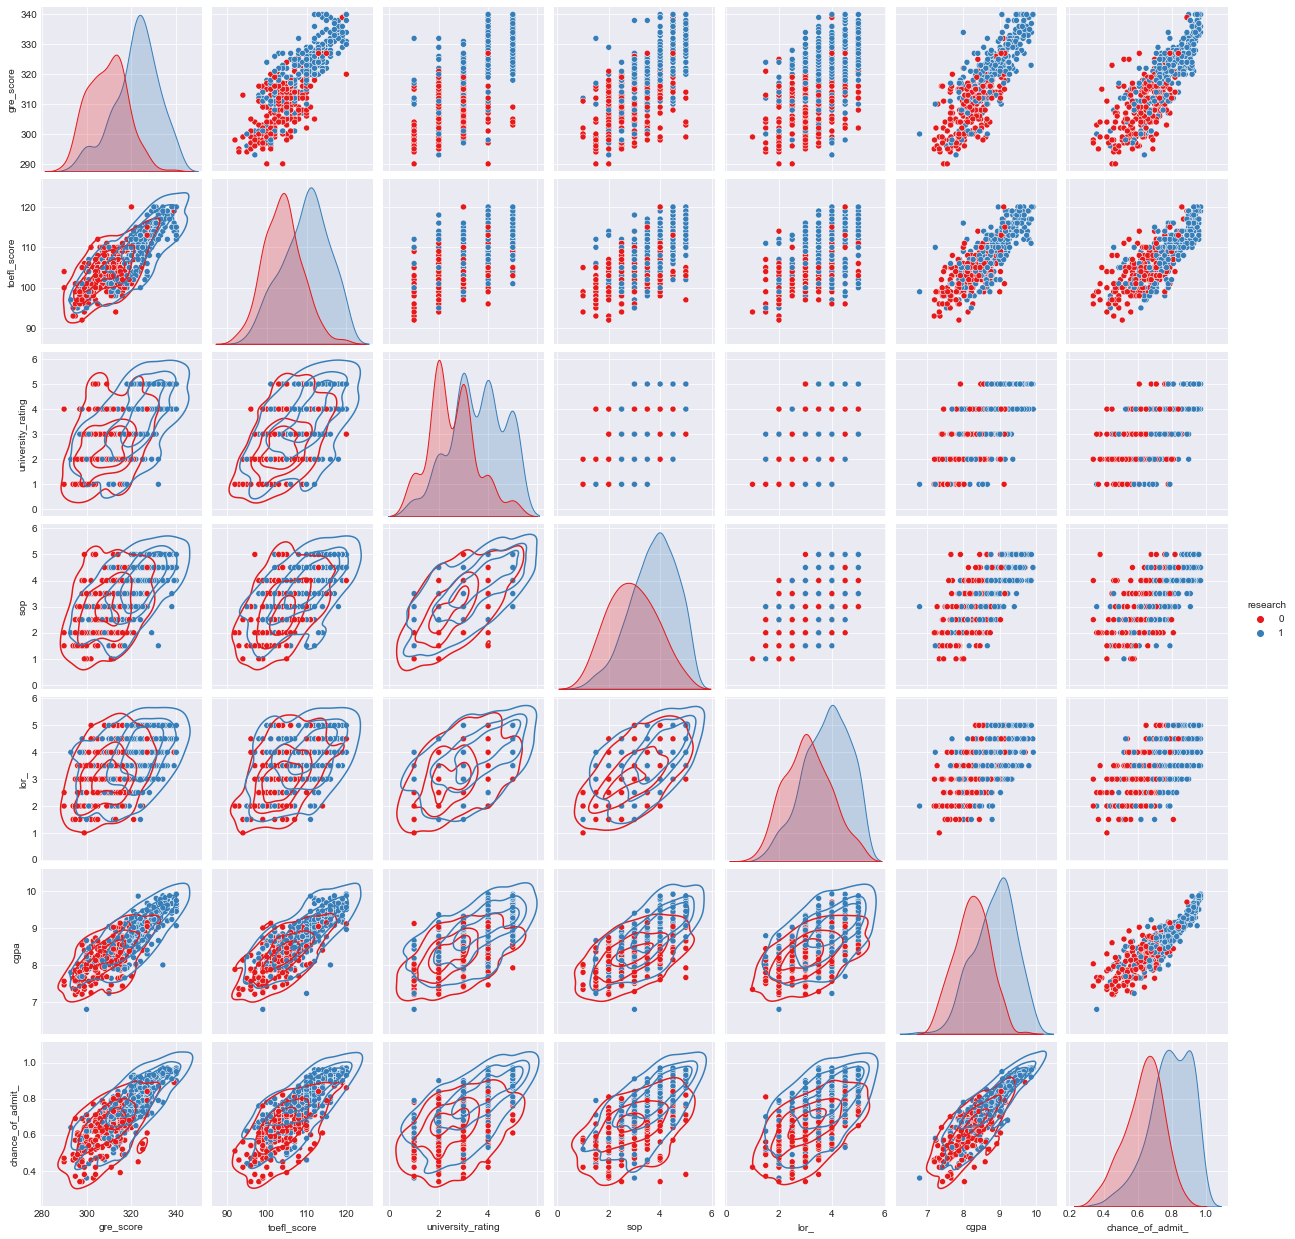


Pairplot with University Rating: 



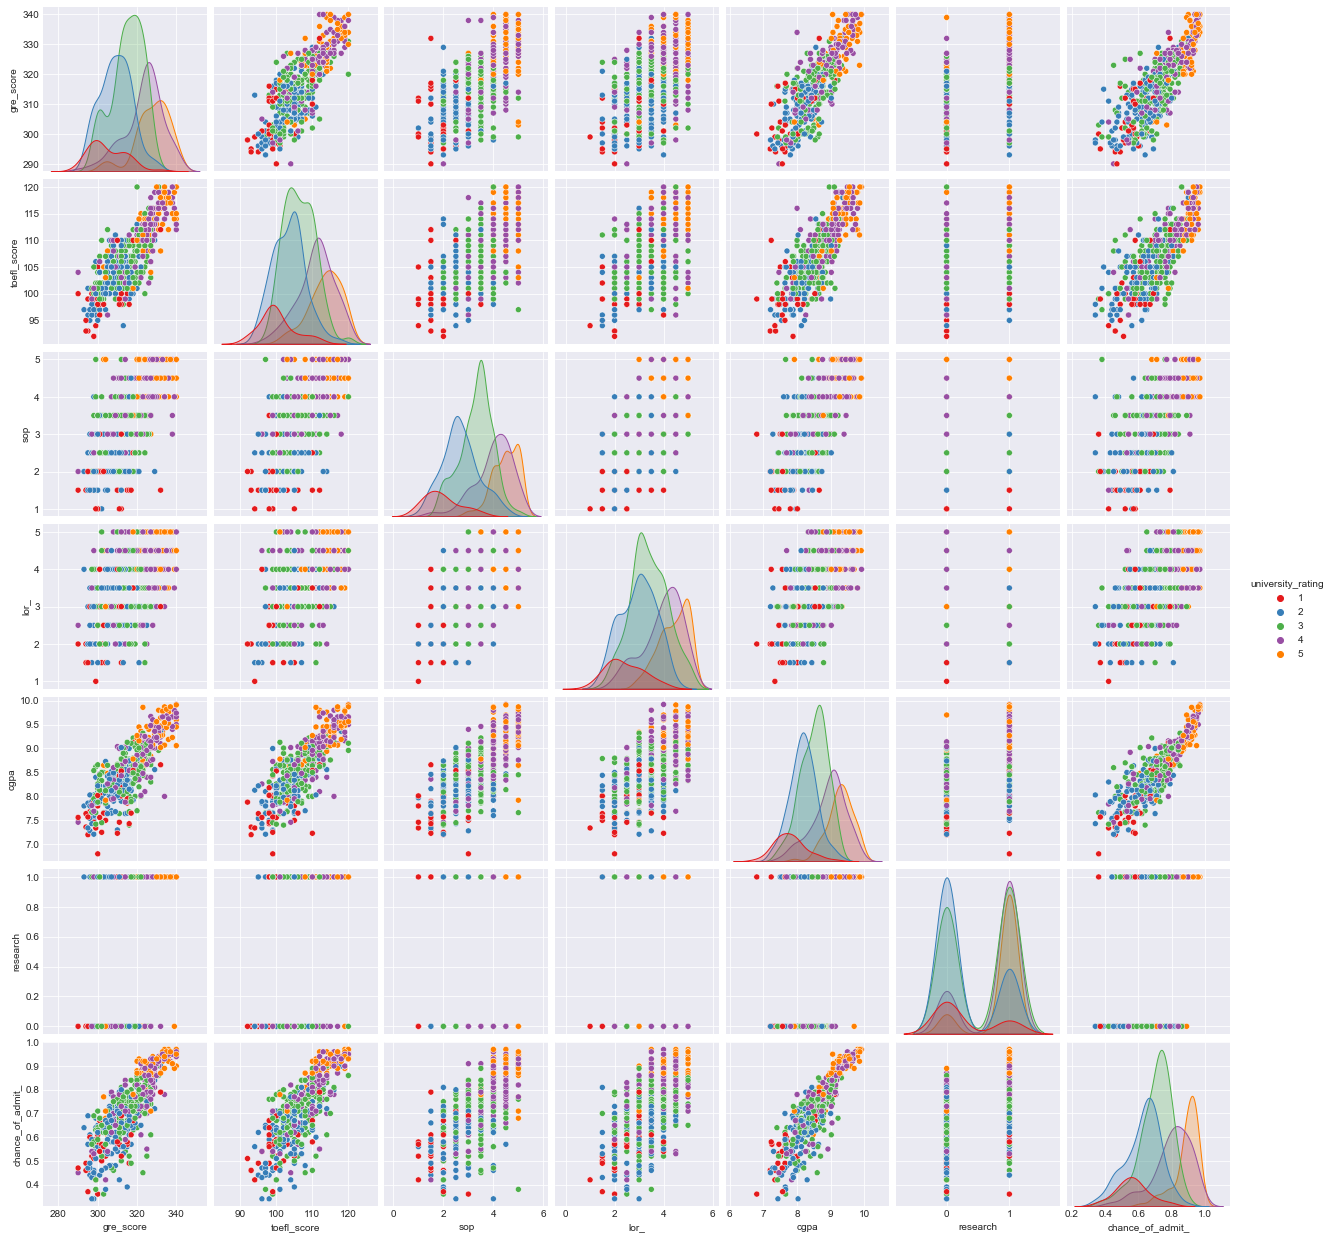

In [5]:
eda.bivariate_analysis(pairplot=True)

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>People with higher GRE and TOEFL have done some research work. They also seem to have higher GPAs and consequently higher chances of admission.
<li>Between university rating and chances of admission, there seems to be a positive trend for all ratings, given research is done. Most students at university rating 5 have done research.
</ul>

### Contigency between University Rating and Research Experience

University Rating and Reasearch Experience: 



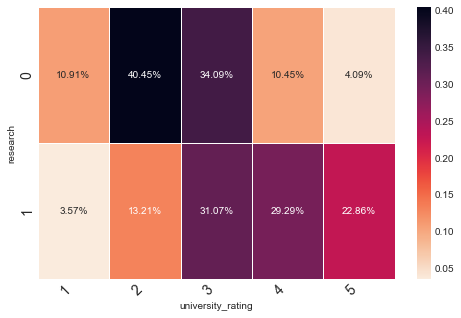

In [6]:
eda.bivariate_analysis(contigency_table=True)

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<p>
There is clear relationship positive relationship between better university rating and research done.
</p>

### Relationship with University Rating & Research Experience between Variables

Chances of Admit Based on Research Experience for Different University Rating: 



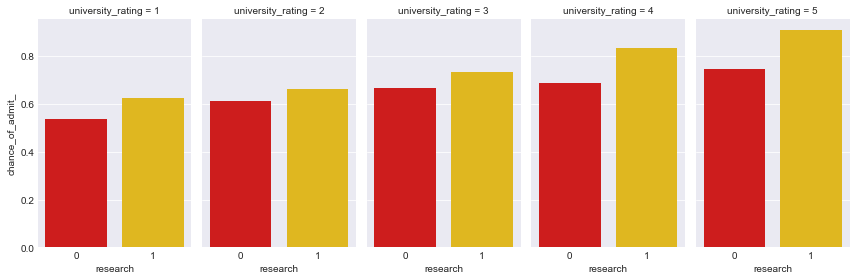


CGPA & the Relationship b/w Research Experience + Different University Rating: 



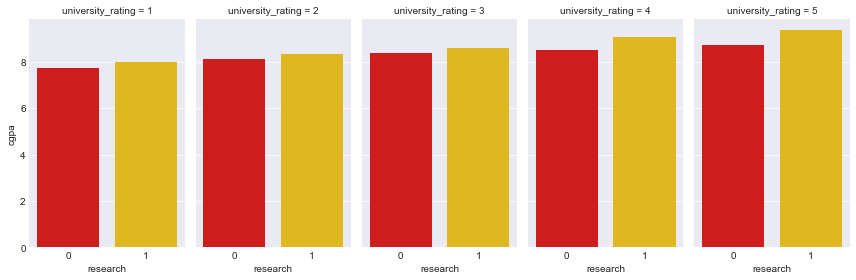


SOP Strength & the Relationship b/w Research Experience + Different University Rating: 



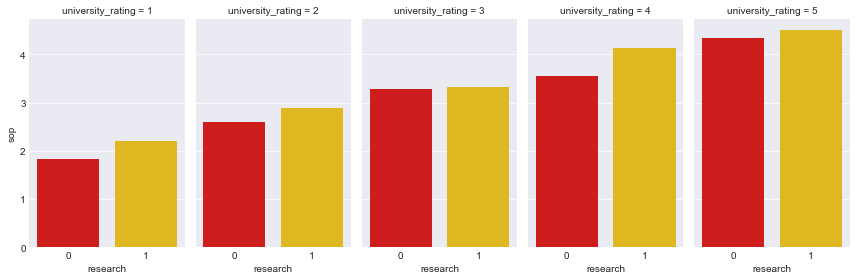


LOR Strength & the Relationship b/w Research Experience + Different University Rating: 



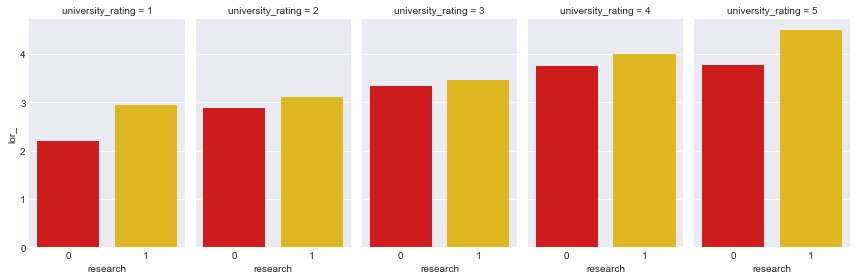


GRE Score & the Relationship b/w Research Experience + Different University Rating: 



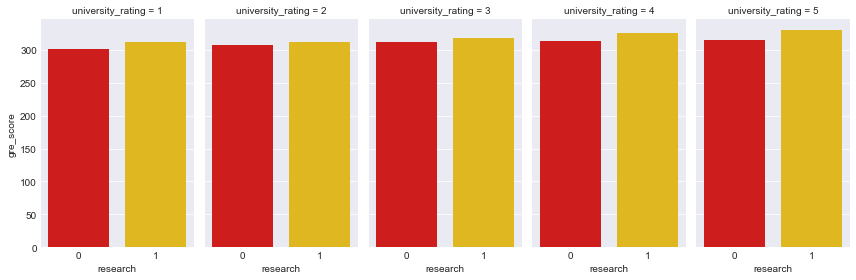


TOEFL Score & the Relationship b/w Research Experience + Different University Rating: 



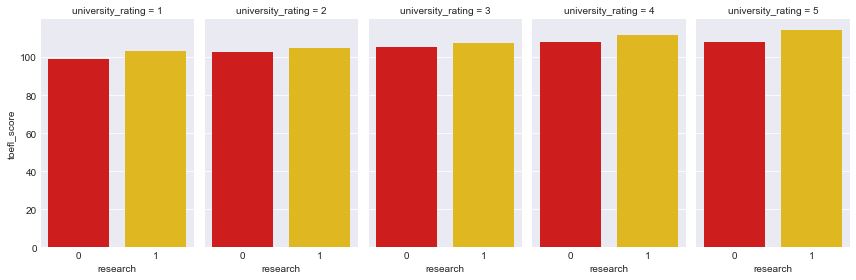

In [7]:
eda.bivariate_analysis(catplot=True)

---
## Regression Modelling
**Steps involved:**
1. Data Pre-processing
1. Building the model
2. Testing the assumptions
3. Evaluating the performance

### Data Pre-processing
1. Duplicate value check - No duplicates
1. Missing value treatment - No missing values
1. Outlier treatment - Not needed
1. Feature engineering - Scaled using Standard Scaler | Removal with VIF
1. Data preparation for modeling

In [8]:
reg_model = LinearRegression(data = data, endog_var = "chance_of_admit_", scale = True, scaling_method = StandardScaler)
reg_model.split_train_test(test_size=0.2, random_state = 42)
reg_model.multicollinearity_check(threshold = 4.5, remove_multi_col = True)

Columns Dropped: ['cgpa']


,VIF,Features,status
0,4.489983,gre_score,Available
1,3.664298,toefl_score,Available
2,2.572110,university_rating,Available
3,2.785764,sop,Available
4,1.977698,lor_,Available
5,4.654540,cgpa,Dropped
6,1.518065,research,Available


### Building the Model
1. Build the Linear Regression model and comment on the model statistics
2. Display model coefficients with column names

In [9]:
trained_model = reg_model.fit_ols_regression(add_constant=True, col_to_drop=None)
reg_model.model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       chance_of_admit_   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.48e-122
Time:                        10:42:09   Log-Likelihood:                 512.81
No. Observations:                 400   AIC:                            -1012.
Df Residuals:                     393   BIC:                            -983.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.003    213.825      0.000       0.718       0.731
gre_score             0.0543      0.007      8.317      0.000       0.041       0.067
toefl_score           0.0336      0.006      5.366      0.000       0.021       0.046
university_rating     0.0094      0.005      1.737      0.083      -0.001       0.020
sop                   0.0120      0.006      2.157      0.032       0.001       0.023
lor_                  0.0257      0.005      5.537      0.000       0.017       0.035
research              0.0121      0.004      2.906      0.004       0.004       0.020
==============================================================================
Omnibus:                       64.130   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.515
Skew:                          -0.947   Prob(JB):                     2.73e-24
Kurtosis:                       4.711   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>The Adjusted R-square indicates there that we can explain 76.8% of the chances of admissions with our current variables.
<li>F-statistic is simple stating that our model performs better with the independent variables than with just a constant.
<li>A lower AIC/BIC value indicates the model is a good fit. We should compare it with other model iterations.
<li>University rating as a predictor variable is statistically insignificant. We should remove it.
<li>The second part of the summary deals more with normality. The data clearly is not normal as proved by the results and EDA earlier.
</ul>

### Testing the Assumptions
1. The **mean of residuals** is nearly zero
3. **Linearity of variables** (no pattern in the residual plot)
4. Test for **Homoscedasticity**
5. **Normality of residuals** (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

-------------------------------------------------------------------------------------
Residuals Check


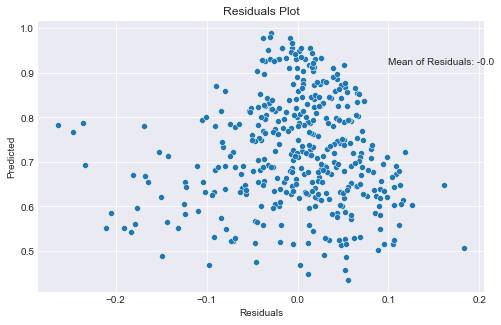

-------------------------------------------------------------------------------------
Normality Check for: Residuals



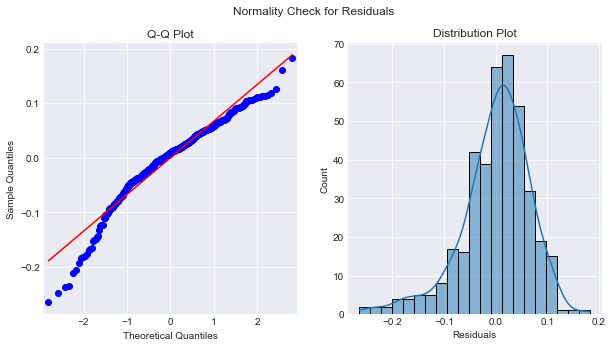

-------------------------------------------------------------------------------------
Shapiro-Wilk p-val: 0.0 | alpha: 0.05
We have sufficient evidence to say that Residuals doesn't come 
from a normal distribution.
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Goldfeld-Quandt Homoskedasticity Test
Alpha: 0.05 | pvalue: 0.49
Null: Error terms are homoscedastic | Alternative: Error terms are heteroscedastic.
We do not have sufficient evidence to reject the null hypothesis.
-------------------------------------------------------------------------------------


In [10]:
reg_model.residual_analysis

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>Mean of the residuals is zero and there doesn't seem to be any linearity between them.
<li>The residuals however are not normally distributed, but they are homoscedastic.
</ul>

### Evaluating the Performance
1. Metrics to be checked - MAE, RMSE, R2, Adj R2
2. Train and test performances are checked
3. Comments on the performance measures and if there is any need to improve the model or not

In [11]:
reg_model.performance_analysis

,Train,Test
MAE,0.05,0.054
MSE,0.005,0.005
RMSE,0.067,0.072
R^2 scikit-learn,0.7713,0.7478
Adj. R^2 scikit-learn,0.7672,0.7287


<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>RMSE indicates that on average we are off in our estimates by 6.7% on train data and 7.2% on test data.
<li>R^2 and Adj. R^2 on test data decrease in performance.
</ul>

---
## Iterations of the Model

### All Variables Exist

In [12]:
reg_model1, trained_model1, performance1 = lr_models(data = data, endog_var="chance_of_admit_", 
                                                     remove_multi_col = False, add_constant=True, 
                                                     col_to_drop = None, residual_analysis = False)
print()
print(reg_model1.model_summary)
print()
print(performance1)


                            OLS Regression Results                            
Dep. Variable:       chance_of_admit_   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          3.41e-142
Time:                        10:42:10   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.0

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>The performance does get a bump by including GPA, but we can still remove university rating and SOP strength.
</ul>

### Without University Rating and SOP

In [13]:
reg_model3, trained_model3, performance3 = lr_models(data = data, endog_var="chance_of_admit_", 
                                                     remove_multi_col = False, add_constant=True, 
                                                     col_to_drop = ["university_rating", "sop"], residual_analysis = False)
print()
print(reg_model3.model_summary)
print()
print(performance3)


                            OLS Regression Results                            
Dep. Variable:       chance_of_admit_   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.36e-144
Time:                        10:42:10   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830     

<div class="alert alert-block alert-success"><b><i>Observations</i></b></div>
<ul>
<li>We only see a slight increase in the R^2 and Adj. R^2.
</ul>

---
## Business Actionables and Insights

**Good Predictors:**
GRE Scores | TOEFL Scores | LOR Strength | CGPA | Research Experience

1. Students aiming for higher education need to have a good college GPA, ideally above 8.5.
1. Having some research experience boosts the chances of getting into a college but the change is not that high.
1. LORs boost the chances of admission. SOPs are not a very good predictor of college admissions. However, the quality of LORs is directly related to the quality of SOPs.
1. GRE and TOEFL scores are important to increase chances of admission. 

**Business Focus:**
1. They should target the sophomores more specifically and motivate them to pursue some sort of research.
1. For freshman's, they should advise to keep a consistently high GPA to ensure a minimum of 8.5 or above throughout college life. If targeted, it would be easy to transition freshers to pursue some research.
1. While a good GRE & TOEFL score is needed across all universities, having high scores, increase the chance of admission to a highly ranked university. Therefore, based on the specific university aim for a student, there can be slight variation in such scores and the focus on them can be appropriately decided.
1. LOR and SOP strength closely relate to the university strength. A strong LOR has a direct relationship with a strong SOP. Since SOP is more specific to the student, Jamboree should ensure that LORs are of high quality. The stronger the LOR, the better the chances of getting into a highly ranked university.

**Summary:**
1. Consistent GRE and TOEFL Scores on average should be the aim and student preparation can be targeted accordingly.
1. Better GPA and good LORs give a significant boost to the type of university. LOR formats can be created for the students. Freshers to be targeted to ensure good GPA consistently.

**Outcome:**
<br>
If done, Jamboree with a linear regression model can predict the chances of admission with approximately 80% accuracy and 5% to 6% variation.

**Improvements:**
1. The relationship is not linear and non-linear models have the possibility of giving better results.
2. Variables like: 
    * Internship/Work experience
    * Rating of undegrad college
    * Relationship between the degree pursued during graduation and degree to pursue for higher ed.
    * Financial background and strength
<br>Can improve the model to explain chances of admission.
3. Type of scores and students can actually be segregated based on the aim for a specific university/course/country by clustering techniques. 